In [83]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [84]:
df = pd.read_csv('..//output//final.csv')

In [85]:
df.head()

,Graph number,Number of vertices,starting colour vertex,ending colour vertex,loop,cycle,step time
0,1,2,"[1, 1]","[1, 1]",yes,1,1
1,1,2,"[1, -1]","[1, -1]",yes,1,2
2,1,3,"[1, 1, 1]","[1, 1, 1]",yes,1,1
3,1,3,"[1, 1, -1]","[1, 1, 1]",yes,2,1
4,1,3,"[1, -1, 1]","[1, 1, 1]",yes,2,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866498 entries, 0 to 866497
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Graph number            866498 non-null  int64 
 1   Number of vertices      866498 non-null  int64 
 2   starting colour vertex  866498 non-null  object
 3   ending colour vertex    866498 non-null  object
 4   loop                    866498 non-null  object
 5   cycle                   866498 non-null  int64 
 6   step time               866498 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 46.3+ MB


In [87]:
df.describe()

,Graph number,Number of vertices,cycle,step time
count,866498.000000,866498.000000,866498.000000,866498.000000
mean,15041.146996,5.985791,2.535094,1.159431
std,9248.146706,0.121849,1.119478,0.366078
min,1.000000,2.000000,1.000000,1.000000
25%,6951.000000,6.000000,2.000000,1.000000
50%,14723.000000,6.000000,2.000000,1.000000
75%,22822.000000,6.000000,3.000000,1.000000
max,32737.000000,6.000000,7.000000,2.000000


In [88]:
sns.set_style("whitegrid")
sns.despine()

<Figure size 432x288 with 0 Axes>

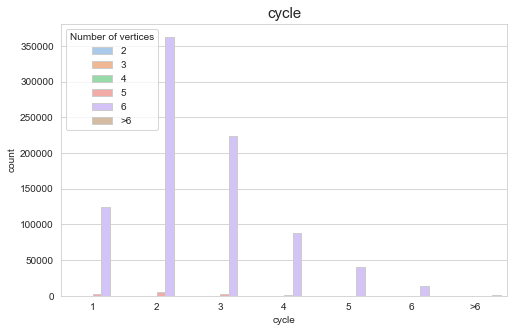

In [89]:
data = df.copy()
data.loc[data['cycle'] > data['cycle'].quantile(0.99)] = '>6'
plt.figure(figsize=(8,5))
sns.countplot(x=data['cycle'].astype('str').sort_values(), palette = 'pastel', edgecolor = '0.8', hue = data['Number of vertices'])
plt.title("cycle",fontsize=15)
plt.show()

<AxesSubplot:xlabel='Number of vertices', ylabel='count'>

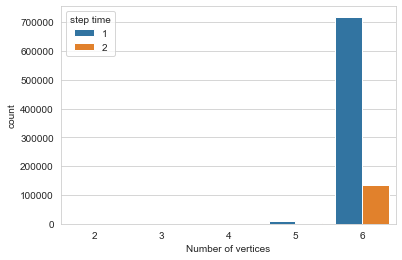

In [90]:
sns.countplot(x="Number of vertices", hue="step time",  data=df)

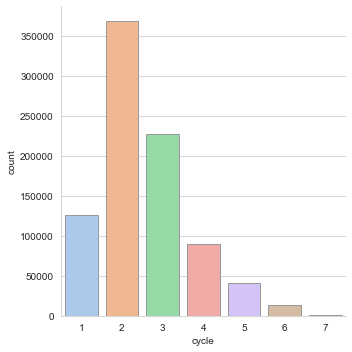

In [91]:
sns.catplot(x="cycle", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

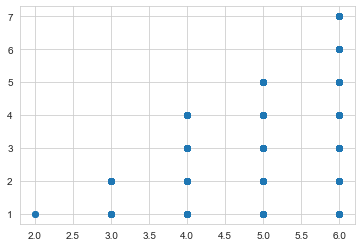

In [92]:
plt.scatter(x=df['Number of vertices'], y=df['cycle'], marker='o');

In [98]:
from scipy.stats import kurtosis, skew
x = df['step time']
kurt = kurtosis(x, fisher=True)
skew = skew(x)
print(kurt, skew)

1.4619605766218928 1.8606344554000638


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.36063446, 1.46063446, 1.56063446, 1.66063446, 1.76063446,
        1.86063446, 1.96063446, 2.06063446, 2.16063446, 2.26063446,
        2.36063446]),
 <BarContainer object of 10 artists>)

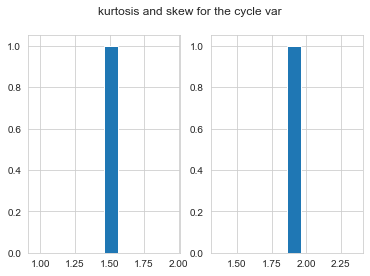

In [108]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('kurtosis and skew for the cycle var')
axs[0].hist(kurt, bins =10)
axs[1].hist(skew, bins =10)